In [2]:
import pandas as pd

In [6]:
data_dir = "../../../data/test_data/"
df = pd.read_csv(data_dir + "SMSSpamCollection", sep='\t', header=None)

In [14]:
df[df[0]=='ham'][0].count()

4825

In [17]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1],df[0])

In [35]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.fit_transform(X_test_raw)

<1393x3914 sparse matrix of type '<class 'numpy.float64'>'
	with 18492 stored elements in Compressed Sparse Row format>

In [47]:
# print(X_train_raw.shape)
# print(X_test_raw.shape)
# print(X_train.shape)
# print(X_test.shape)
# len(X_train_raw)
print(X_train.shape)
print(X_train)



(4179, 7467)
  (0, 2305)	0.191309337439
  (0, 3227)	0.137164974669
  (0, 3281)	0.202826154972
  (0, 4690)	0.204925335347
  (0, 897)	0.243084890502
  (0, 3620)	0.17420408997
  (0, 3062)	0.227292661061
  (0, 1197)	0.153349398558
  (0, 4205)	0.353793712198
  (0, 4891)	0.255659740535
  (0, 3502)	0.119756841288
  (0, 6564)	0.109107543922
  (0, 1035)	0.297059553249
  (0, 5396)	0.302524331485
  (0, 4661)	0.146866625677
  (0, 2998)	0.152294182406
  (0, 3581)	0.353793712198
  (0, 3459)	0.151997622812
  (0, 6560)	0.13789116689
  (0, 5150)	0.297059553249
  (1, 3291)	0.354080266503
  (1, 2450)	0.601602262184
  (1, 3601)	0.215726656508
  (1, 6682)	0.334734711114
  (1, 4256)	0.424340663445
  :	:
  (4175, 2091)	0.48195065998
  (4175, 6501)	0.357404157547
  (4175, 3385)	0.297355675167
  (4175, 4882)	0.471330223136
  (4176, 7245)	0.327919795237
  (4176, 6702)	0.446849885321
  (4176, 1818)	0.369427173056
  (4176, 2193)	0.745866845816
  (4177, 3601)	0.149087822004
  (4177, 7430)	0.114754804813
  (4177, 4

In [38]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

ValueError: X has 4037 features per sample; expecting 7467

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4 1]
 [2 3]]


Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


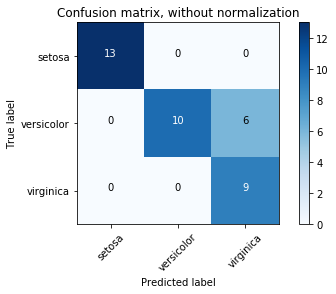

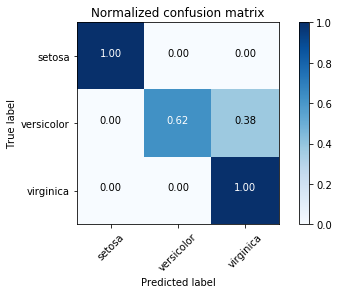

In [51]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()